# Augmentation을 하는 이유 및 방법

## Data Augmentation이란
- 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법.
- 일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용.
- 데이터가 많아진다는 것은 과적합(overfitting)을 줄일 수 있다는 것을 의미.
- data augmentation은 데이터를 늘릴 뿐만 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와주기도 함.
- 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있음.

### Image Augmentation

#### Flipping
- 이미지를 대칭하는 기능으로 좌우 또는 상하로 이미지를 반전시키는 방법임. 
- 분류 문제에선 상관없지만 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해줘야 함.
- 문자를 인식하는 경우에도 다른 글자가 될 수 있으니 주의해야 함.

#### Gray scale
- Gray scale은 3가지 채널(channel)을 가진 RGB 이미지를 하나의 채널을 가지도록 함.
- 흑백이 아닌 다른 색으로 표현할 수도 있음. 이런 경우에는 RGB 각 채널마다 가중치를 주어 가중합을 하면 됨. 사용된 가중치의 경우 합이 1이 됨.

#### Saturation
- RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경하고 S(saturation) 채널에 오프셋(offset)을 적용, 조금 더 이미지를 선명하게 만드는 방법임.

#### Brightness
- 밝기를 조절하는 방법으로 이미지는 RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워지므로 이를 통해 밝기를 변경할 수 있음.

#### Rotation
- 이미지의 각도를 변환하는 방법으로 90도의 경우 직사각 형태가 유지되어 이미지 크기만 조절하면 바로 사용할 수 있음. 90도 단위가 아닐 때 기존 이미지로 채우지 못하는 영역을 어떻게 처리할지 유의해야 함.

#### Center Crop
- 이미지의 중앙을 기준으로 확대하는 방법임. 너무 작게 크롭하면 본래의 라벨과 맞지 않을 수도 있으니 주의해야 함.

#### Etc.
- Gaussian noise, Contrast change, Sharpen, Affine transformation, Padding, Blurring

## Flip

In [1]:
#데이터 로드
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

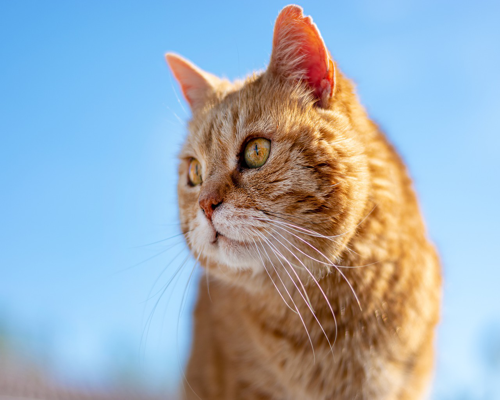

In [2]:
#이미지 리사이징
image = Image.open(sample_img_path).resize((500, 400)
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

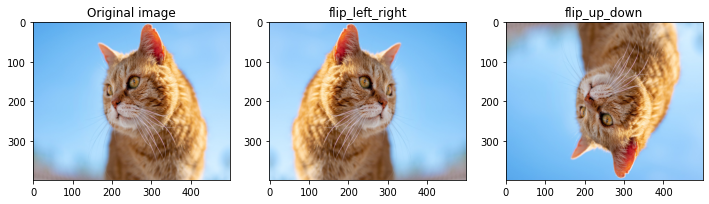

In [3]:
#Flip 적용
#flip_left_right와 flip_up_down 두 가지로 좌우와 상하 반전으로 구분 됨.
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

- 일괄적으로 뒤집는 것이 아니라 확률에 따라 적용되도록 해야 함. 
- 반전되지 않은 원본 데이터도 활용이 될 수 있기 때문에 이를 위해 random_flip_left_right와 fandom_flip_up_down을 사용할 수 있음. 
- 이 둘을 합쳐서 fandom_flip으로 상하좌우 반전을 적용할 수도 있음.

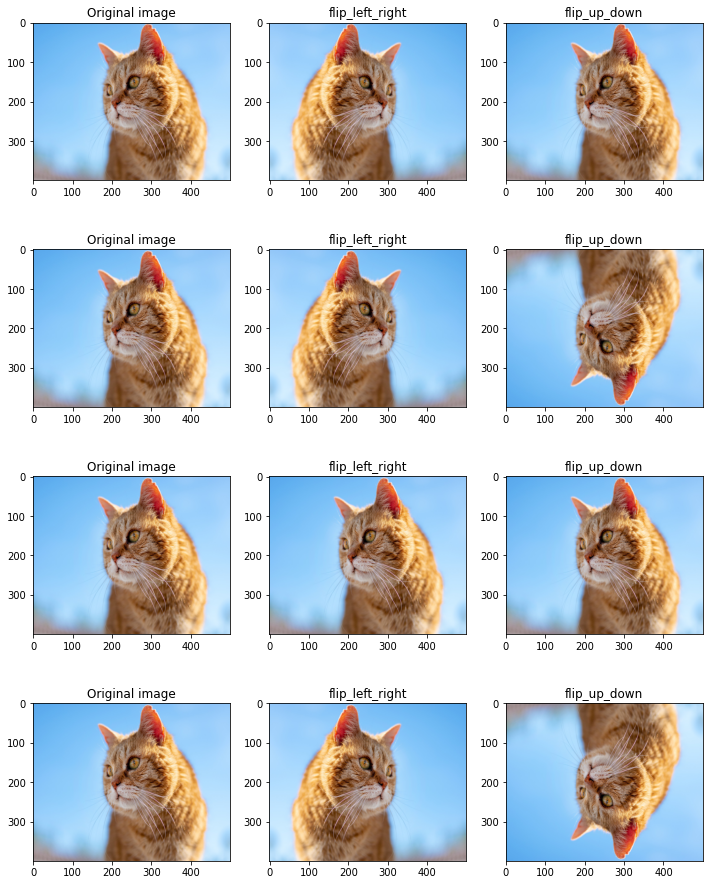

In [5]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## Center Crop
- 중앙을 기준으로 자른 이미지를 사용하는 기법.
- central_fraction은 얼마나 확대를 할지를 조절하는 매개변수.
- central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야 함.

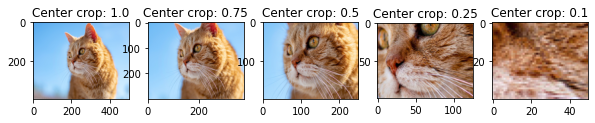

In [6]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [7]:
#tf.random.uniform을 사용해서 central_fraction 매개변수에 전달할 값을 만듦.
#cropped_tensor를 만들어내는 random_central_crop() 함수
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

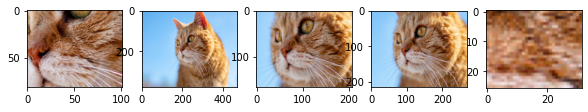

In [8]:
#랜덤하게 central_fraction 범위 조절
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## 텐서플로우를 사용한 Image Augmentation

### random_crop

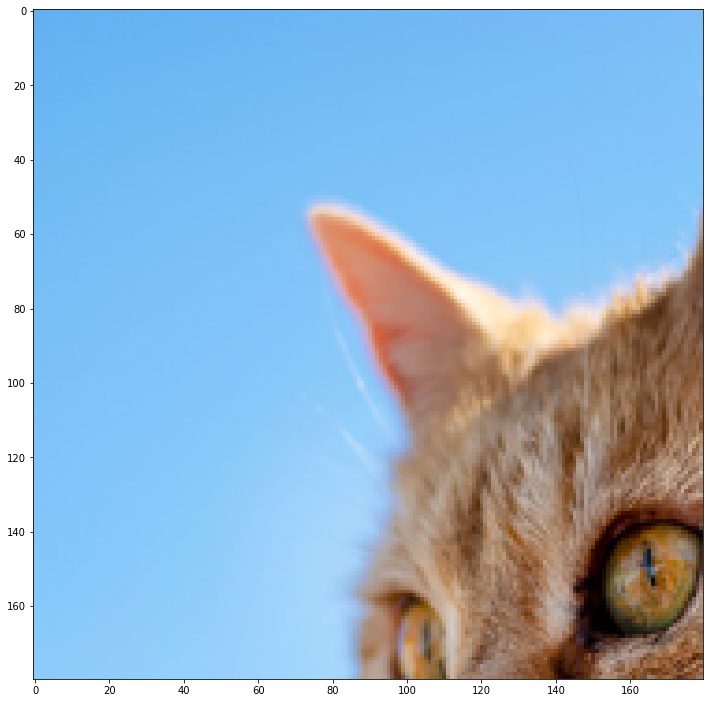

In [9]:
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

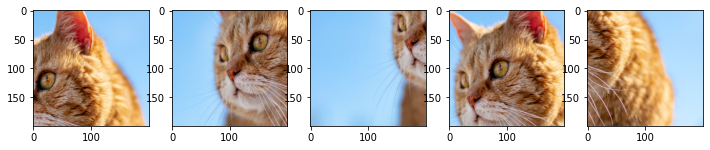

In [11]:
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_image)

### random_brightness

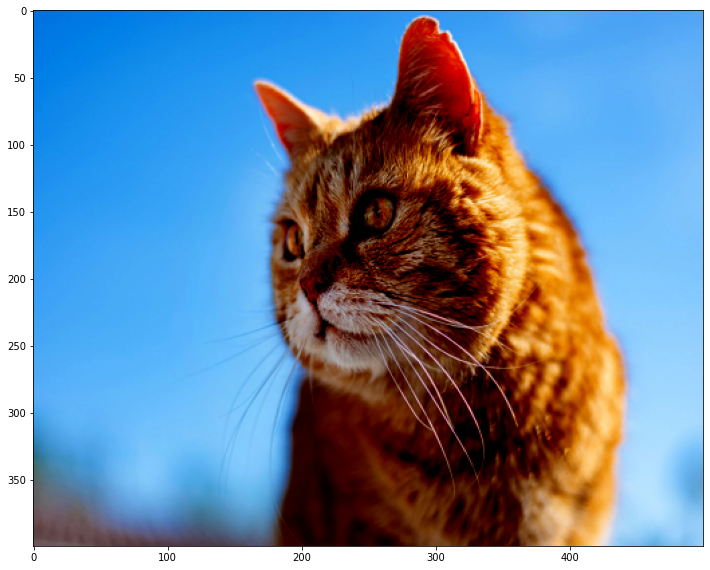

In [12]:
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

- tf.image.random_brightness()만 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과하게 될 수도 있으므로 random_brightness 적용 후 tf.clip_by_value()를 적용해주어야 함.

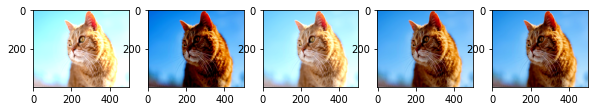

In [14]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## imgaug 라이브러리 사용
- augmentation만을 모아서 제공하는 전문 라이브러리들 중 하나.
- 정답 데이터는 원본 데이터의 augmentation에 따라 같이 변화되어야 함.
- imgaug에서는 배열을 이미지의 기본 형태로 사용함.
- 때문에 PIL Image 데이터형을 넘파이 배열로 변환해야 함.

In [15]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

### 아핀 변환(Affine transform)
-  2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있음.

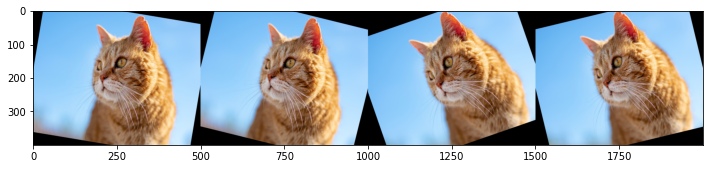

In [16]:
#-25도와 25도 사이에 랜덤하게 각도를 변환하는 augmention
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Crop()
- crop하려는 원본 이미지의 비율을 매개변수로 사용해 이미지를 생성함.

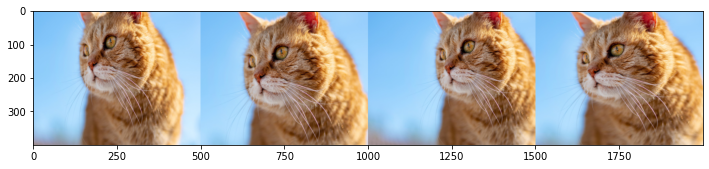

In [17]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Sequential
-  여러 가지의 augmentation 기법을 순차적으로 적용할 수 있음.

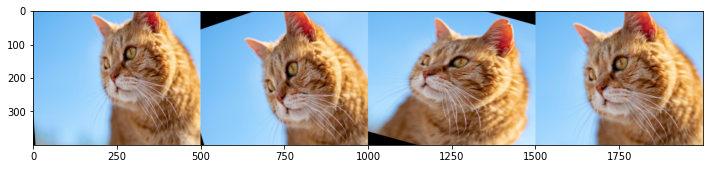

In [18]:
#rotate와 crop이 적용
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25)),
        iaa.Crop(percent=(0, 0.2)) 
        ])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

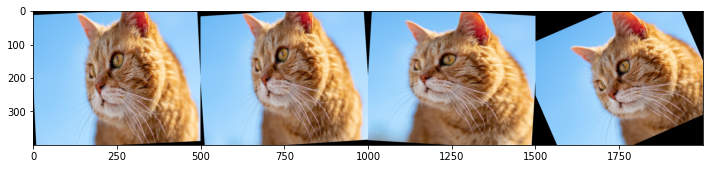

In [19]:
#Augmentation 순서를 random으로 기법들의 순서를 바꾸어 사용
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)), ], random_order=True)

images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.OneOf()
- 여러 augmentation 기법들 중 하나만 랜덤으로 선택할 수 있음.

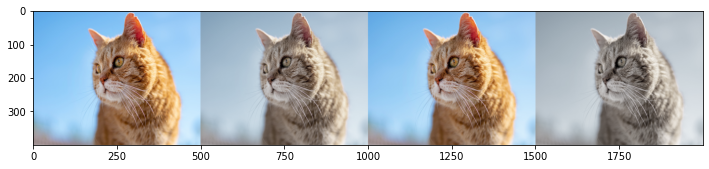

In [22]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.AddToSaturation((-50, 50))
        ])

images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Sonetimes
- augmentation들이 일정 확률로 선택되게 함.

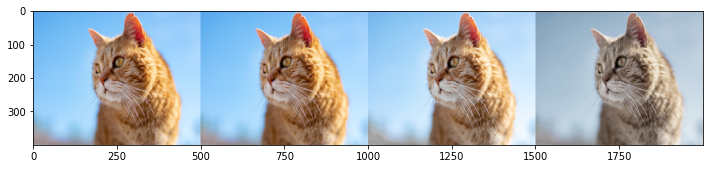

In [28]:
#iaa.AddToSaturation()을 0.6의 확률로, 
#iaa.Grayscale()를 0.2의 확률로 적용하는 augmentation 함수

images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
         iaa.Sometimes(0.6, iaa.AddToSaturation((-50, 50))),
         iaa.Sometimes(0.2, iaa.Grayscale(alpha=(0.0, 1.0)))
        ])

images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### 개와 고양이를 분류하는 모델을 만들기 위한 augmentation을 만드는 실습

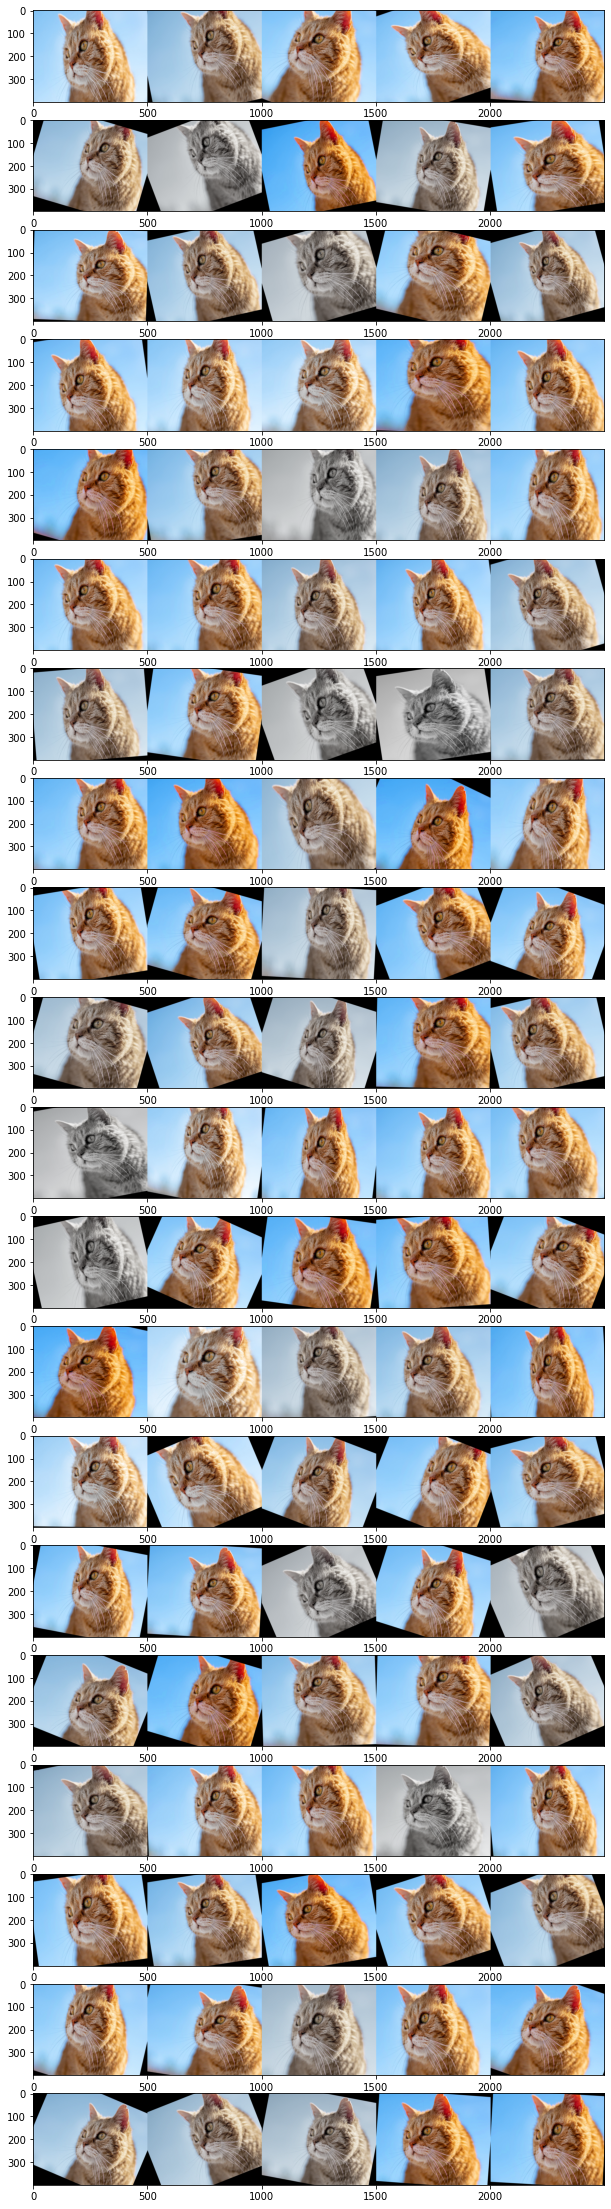

In [29]:
seq = iaa.Sequential([
        iaa.OneOf([iaa.Grayscale(alpha=(0.0, 1.0)),
            iaa.Sometimes(0.5, iaa.AddToSaturation((-50, 50))) ]),
        iaa.Sequential([iaa.Crop(percent=(0, 0.2)), iaa.Affine(rotate=(-25, 25)), ], random_order=True)
        ])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()